In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from IPython import display

import time

In [2]:

def plot_state(c):
    """
    Plot a state from Conway's Game of Life.
    """
    
    #plt.imshow(c.current_state==True,interpolation="nearest") #,colors=colors[int(c.state)])
        
    #to_plot = np.ones(c.current_state.shape,dtype=np.float)
    #to_plot[c.current_state] = 1.0
    #to_plot[c.time_since_alive > 0] = 0.5
    
    to_plot = c.current_state
    
    plt.imshow(to_plot,interpolation="nearest",cmap="gray")
    plt.show()


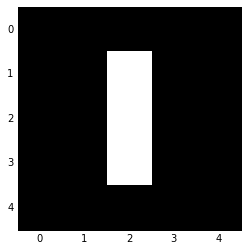

In [20]:
import conway
#c = conway.Conway(x_size=64,y_size=64,starting_density=0.5)

c = conway.Conway(state_file="patterns/oscillators/blinker.0")
plot_state(c)



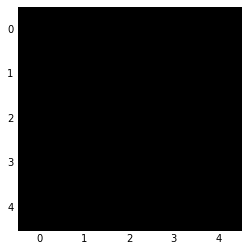

In [22]:
plot_state(c)

for i in range(10):
    #c.iterate_slowly()
    c.iterate()
    
    display.clear_output(wait=True)
    #time.sleep(0.1)
    plot_state(c)
    
    display.display()
    
    time.sleep(0.3)

    

In [27]:
import numpy as np
import scipy.signal


# 1 1 1
# 1 0 1
# 1 1 0
donut_kernel = np.ones((3,3),dtype=int)
donut_kernel[1,1] = 0


 # Example array
current_state = np.zeros((5,5),dtype=int)
current_state[1,2] = 1
current_state[2,2] = 1
current_state[3,2] = 1

print(current_state)
print("")

num_neighbors = scipy.signal.convolve2d(current_state, plus_kernel, mode='same',boundary="wrap")
alone_mask = (current_state == 1)*(num_neighbors  < 2)
crowd_mask = (current_state == 1)*(num_neighbors  > 3)
spawn_mask = (current_state == 0)*(num_neighbors == 3)

current_state[alone_mask] = 0
current_state[crowd_mask] = 0
current_state[spawn_mask] = 1

print(num_neighbors)
print("")
print(current_state)



[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]

[[0 0 1 0 0]
 [0 1 1 1 0]
 [0 1 2 1 0]
 [0 1 1 1 0]
 [0 0 1 0 0]]

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
